## Sentment Analysis

In [ ]:
from textblob import TextBlob


feedback = "Bad product"

# feed = ""
polarity = 0

analysis = TextBlob(feedback)
polarity = polarity + analysis.sentiment.polarity

if(analysis.sentiment.polarity == 0.00):
  feed = "neutral"
elif(analysis.sentiment.polarity > 0.00):
  feed = "positive"
elif(analysis.sentiment.polarity < 0.00):
  feed = "negative"

feed

'negative'

## Image Classification

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import time



import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten,BatchNormalization,Conv2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

In [2]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 400, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 384 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 39.26 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [3]:
!ls

clothing-dataset-small	sample_data


In [4]:
print(os.listdir("./clothing-dataset-small"))

['validation', '.git', 'README.md', 'LICENSE', 'test', 'train']


In [5]:
print(os.listdir("./clothing-dataset-small/train"))

['outwear', 'dress', 'pants', 'shorts', 'shirt', 'skirt', 't-shirt', 'hat', 'shoes', 'longsleeve']


In [6]:
ls = os.listdir("./clothing-dataset-small/train")
ls[0]

'outwear'

In [ ]:
os.rename("./clothing-dataset-small/train/t-shirt","./clothing-dataset-small/train/t_shirt")

In [ ]:
print(os.listdir("./clothing-dataset-small/train"))

['outwear', 'dress', 'pants', 'shorts', 'shirt', 'skirt', 'hat', 'shoes', 't_shirt', 'longsleeve']


In [ ]:
# pants = os.listdir('./clothing-dataset-small/train/pants/')

# longsleeve = os.listdir('./clothing-dataset-small/train/longsleeve/')

# t_shirt = os.listdir('./clothing-dataset-small/train/t_shirt/')

# shorts = os.listdir('./clothing-dataset-small/train/shorts/') 

# shoes = os.listdir('./clothing-dataset-small/train/shoes/') 

# outwear = os.listdir('./clothing-dataset-small/train/outwear/') 

# hat = os.listdir('./clothing-dataset-small/train/hat/') 

# skirt = os.listdir('./clothing-dataset-small/train/skirt/') 

# shirt = os.listdir('./clothing-dataset-small/train/shirt/') 

# dress = os.listdir('./clothing-dataset-small/train/dress/') 


In [ ]:
# data = []
# labels = []

# categories_path = ["pants", "longsleeve", "t_shirt", "shorts", "shoes", "outwear","hat", "skirt", "shirt", "dress"]   
# categories_name = [pants, longsleeve, t_shirt, shorts, shoes, outwear,hat, skirt, shirt, dress]      

# j = 0


# for x, y in zip(categories_path, categories_name):

#   for i in y:
    
#     try:
#       image = cv2.imread("./clothing-dataset-small/train/" + x + "/"+i)
#       image_array = Image.fromarray(image , 'RGB')
#       resize_img = image_array.resize((50, 50))
#       rotated90 = resize_img.rotate(90)
#       blur = cv2.blur(np.array(resize_img) ,(10,10))
#       data.append(np.array(resize_img))
#       data.append(np.array(rotated90))
#       data.append(np.array(blur))
#       labels.append(j)
#       labels.append(j)
#       labels.append(j)

#     except AttributeError:
#       print('')

#   j=j+1
    

In [ ]:
# data = np.array(data)
# labels = np.array(labels)

# # np.save('Products' , data)
# # np.save('Labels' , labels)

In [ ]:
# print('Products : {} | labels : {}'.format(data.shape , labels.shape))

In [ ]:
# plt.figure(1 , figsize = (20 , 15))
# n = 0 
# for i in range(49):
#     n += 1 
#     r = np.random.randint(0 , data.shape[0] , 1)
#     plt.subplot(7 , 7 , n)
#     plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
#     plt.imshow(data[r[0]])
#     # plt.title('{} : {}'.format('Pant' if labels[r[0]] == 0  else 'Unifected' ,
#     #                            labels[r[0]]) )

#     plt.title(labels[r[0]])
#     plt.xticks([]) , plt.yticks([])
    
# plt.show()

In [ ]:
# n = np.arange(data.shape[0])
# np.random.shuffle(n)
# data = data[n]
# labels = labels[n]


# data = data.astype(np.float32)
# labels = labels.astype(np.int32)

In [ ]:
# from sklearn.model_selection import train_test_split

# train_x , test_x , train_y , test_y = train_test_split(data , labels , 
#                                             test_size = 0.2 ,
#                                             random_state = 100)


In [ ]:
# plt.figure(1 , figsize = (30 ,5))
# n = 0 
# for z , j in zip([train_y , test_y] , ['train labels', 'test labels']):
#     n += 1
#     plt.subplot(1 , 3  , n)
#     sns.countplot(x = z ,palette="Set3")
#     plt.title(j)
# plt.show()

In [ ]:
# print('train data shape {} , test data shape {}'.format(train_x.shape, test_x.shape))

In [ ]:
# from keras.utils.np_utils import to_categorical
# train_y= to_categorical(train_y)


In [ ]:
# keras.backend.clear_session()

# model1 = Sequential()
# model1.add(Convolution2D(32,(5,5),activation='tanh',input_shape = (50, 50, 3)))
# model1.add(BatchNormalization())
# model1.add(MaxPooling2D(2,2))
# model1.add(Dropout(0.2))
# model1.add(Convolution2D(32,(5,5),activation='tanh'))
# model1.add(BatchNormalization())
# model1.add(MaxPooling2D(2,2))
# model1.add(Dropout(0.2))
# model1.add(Convolution2D(64,(5,5),activation='tanh'))
# model1.add(BatchNormalization())
# model1.add(MaxPooling2D(2,2))
# model1.add(Dropout(0.2))
# model1.add(Flatten())
# model1.add(Dense(64,activation='tanh'))
# model1.add(Dropout(0.2))

# # model1.add(Dense(128,activation='elu'))
# # model1.add(Dropout(0.2))
# # model1.add(Dense(128,activation='elu'))
# # model1.add(Dropout(0.2))
# # model1.add(Dense(64,activation='elu'))
# # model1.add(Dropout(0.2))

# model1.add(Dense(10,activation='softmax'))
# model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# # learning_rate = 0.01

# # model1.compile(
# #     optimizer=keras.optimizers.Adam(learning_rate),
# #     loss=keras.losses.CategoricalCrossentropy(from_logits=True),
# #     metrics=["accuracy"],
# # )


In [ ]:
# # set early stopping monitor
# early_stopping_monitor = EarlyStopping(patience = 3) 

In [ ]:
# # fitting our sequential model
# t0=time.time()
# CNN2 = model1.fit(train_x, train_y, epochs = 100, batch_size=50, validation_split = 0.2, callbacks = [early_stopping_monitor])
# print()
# print("="*40)
# print()
# print("Time taken to train the neural model:", round(time.time()-t0, 2), "seconds")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
def make_model(learning_rate, droprate):
    base_model = Xception( weights='imagenet',  input_shape=(299, 299, 3), include_top=False  )

    base_model.trainable = False

    inputs = keras.Input(shape=(299, 299, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(100, activation='relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)
    
    model.compile( optimizer=keras.optimizers.Adam(learning_rate),
                   loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=["accuracy"])
    
    return model

In [ ]:
image_size = (299, 299)
batch_size = 32

In [ ]:
train_gen = ImageDataGenerator( preprocessing_function=preprocess_input,
                                shear_range=10.0,
                                zoom_range=0.1,
                                horizontal_flip=True,  )

train_ds = train_gen.flow_from_directory( "clothing-dataset-small/train",seed=1,
                                         target_size=image_size,
                                         batch_size=batch_size)

Found 3068 images belonging to 10 classes.


In [ ]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory("clothing-dataset-small/validation", seed=1,
                                              target_size=image_size,
                                            batch_size=batch_size)

Found 341 images belonging to 10 classes.


In [ ]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [ keras.callbacks.ModelCheckpoint( "model.h5",
                                              monitor="val_accuracy", 
                                              save_best_only=True,mode='max')
            ]


history_l = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=callbacks)

83689472/83683744 [==============================] - 1s 0us/step
Epoch 1/20
96/96 [==============================] - 1296s 13s/step - loss: 1.1965 - accuracy: 0.6076 - val_loss: 0.4766 - val_accuracy: 0.8270
Epoch 2/20
96/96 [==============================] - 1284s 13s/step - loss: 0.4510 - accuracy: 0.8416 - val_loss: 0.3863 - val_accuracy: 0.8680
Epoch 3/20
96/96 [==============================] - 1293s 13s/step - loss: 0.3691 - accuracy: 0.8752 - val_loss: 0.3925 - val_accuracy: 0.8622
Epoch 4/20
96/96 [==============================] - 1307s 14s/step - loss: 0.3141 - accuracy: 0.8973 - val_loss: 0.3914 - val_accuracy: 0.8651
Epoch 5/20
96/96 [==============================] - 1308s 14s/step - loss: 0.3136 - accuracy: 0.8869 - val_loss: 0.3971 - val_accuracy: 0.8680
Epoch 6/20
96/96 [==============================] - 1307s 14s/step - loss: 0.2734 - accuracy: 0.9049 - val_loss: 0.3921 - val_accuracy: 0.8622
Epoch 7/20
96/96 [==============================] - 1304s 14s/step - loss: 0.

In [ ]:
values  = history_l.history
validation_loss = values['val_loss']
validation_acc = values['val_accuracy']
training_acc = values['accuracy']
training_loss = values['loss']
epochs = range(1, len(training_acc) + 1)

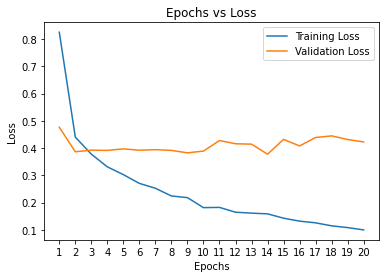

In [ ]:
plt.plot(epochs,training_loss,label = 'Training Loss')
plt.plot(epochs,validation_loss,label = 'Validation Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Loss')
plt.legend()
plt.show()

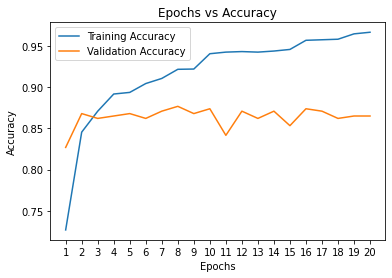

In [ ]:
plt.plot(epochs,training_acc,label = 'Training Accuracy')
plt.plot(epochs,validation_acc,label = 'Validation Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import keras
model = keras.models.load_model('model.h5')
image_size = (299, 299)

In [ ]:
labels = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'shorts',
    8: 'skirt',
    9: 't-shirt'
}

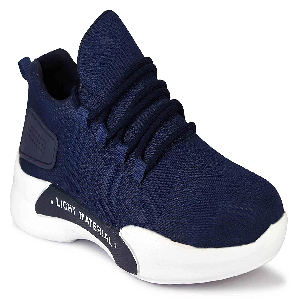

In [ ]:
from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.applications.xception import preprocess_input


path = 'sh.jpg'
img = load_img(path, target_size=(image_size))
img

In [ ]:
import numpy as np

x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)
print(pred[0].argmax(), labels[pred[0].argmax()])



6 shoes
